# Работа с временными рядами

    Данные о дате и времени могут находиться в нескольких видах:

|        |                              |
|--------|------------------------------|
| *Метки даты/времени* | July 4th, 2015 at 7:00am |
| *Временные интервалы и периоды* | Ссылаются на отрезки времени м/у начальной и конечной точками |
| *Временная дельта - продолжительность* | Отрезки времени конкретной длительности 20ч 30с |

### Нативные дата и время языка Python: пакеты ``datetime`` и ``dateutil``

In [1]:
from datetime import datetime

In [2]:
datetime(year=2020, month=7, day=3)

datetime.datetime(2020, 7, 3, 0, 0)

In [3]:
# синтаксический разбор даты из строк
from dateutil import parser
date = parser.parse('4th of July, 2020')

In [4]:
date

datetime.datetime(2020, 7, 4, 0, 0)

In [5]:
# вывод дня недели
date.strftime('%A')

'Saturday'

### Типизированные массивы значений времени: тип ``datetime64`` библиотеки NumPy
    Скорость выше

In [6]:
import numpy as np
import pandas as pd

In [7]:
date = np.array('2020-07-04', dtype=np.datetime64)
date

array('2020-07-04', dtype='datetime64[D]')

In [8]:
date + np.arange(12)

array(['2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
       '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
       '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15'],
      dtype='datetime64[D]')

###### datetime64 и timedelta64  $основаны_на $``базовой единице времени (fundamental time unit - ftu)``
    Следовательно кодируемый диапазон времени имеет предел = 2^64 * ftu
    Соответственно если за ftu принимается нс - то мах диапазон = 600 лет.
    Если за ftu принят день - то мах диапазон = 2^64 дней...

In [9]:
# ftu = день
np.datetime64('2020-07-04')

numpy.datetime64('2020-07-04')

In [10]:
# ftu = минута
np.datetime64('2020-07-04 12:00')

numpy.datetime64('2020-07-04T12:00')

In [11]:
# ns
np.datetime64('2020-07-04 12:59:59.50', 'ns')

numpy.datetime64('2020-07-04T12:59:59.500000000')

###### Описание кодов форматирования даты и времени:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

### Даты и время в библиотеке Pandas: избранное из лучшего

In [12]:
# гибкий синтаксический разбор строки
date = pd.to_datetime('4th of July, 2020')
date

Timestamp('2020-07-04 00:00:00')

In [13]:
date = pd.to_datetime('4th July 2020')
date

Timestamp('2020-07-04 00:00:00')

In [14]:
date = pd.to_datetime('4 July 2020')
date

Timestamp('2020-07-04 00:00:00')

In [16]:
date.strftime('%A')

'Saturday'

In [18]:
# date.strftime?
# Timestamp.strftime(format)

# Return a string representing the given POSIX timestamp
# controlled by an explicit format string.

# Parameters
# ----------
# format : str
#     Format string to convert Timestamp to string.
#     See strftime documentation for more information on the format string:
#     https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior.

# Examples
# --------
# >>> ts = pd.Timestamp('2020-03-14T15:32:52.192548651')
# >>> ts.strftime('%Y-%m-%d %X')
# '2020-03-14 15:32:52'

In [19]:
# векторизованные операции
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15'],
              dtype='datetime64[ns]', freq=None)

### Временные ряды библиотеки Pandas: индексация по времени

In [20]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [21]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [23]:
# существуют операции предназначенные только для дат - фильтр по году...
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Структуры данных для временных рядов библиотеки Pandas

- Для *меток даты/времени* библиотека Pandas предоставляет тип данных ``TimeStamp``, основанный на типе ``np.datetime64``. Соответсвующая ``индексная`` конструкция - ``DateTimeIndex``

- Для *периодов времени* тип данных ``Period``, основанный на типе ``np.datetime64``, кодирует интервал премени фиксированной периодичности. Соответсвующая ``индексная`` конструкция - ``PeriodIndex``

- Для *временных отрезков (продолжительностей)* тип данных ``Timedelta``, основанный на типе ``np.timedelta64``. Соответсвующая ``индексная`` конструкция - ``TimeDeltaIndex``

###### pd.to_datetime() - выполняет синтаксический разбор большинства форматов даты!!!

In [24]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [25]:
# преобразование в объект период, D - день
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [26]:
# TimedeltaIndex создается при вычитании одной даты из другой
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

###### Регулярные последовательности: ф-ия ``pd.date_range()``
``pd.date_range()`` - для меток даты/времени

``pd.period_range()`` - для периодов времени

``pd.timedelta_range()`` - для временных интервалов (дельт).

 - Ф-ии типа ``pd.date_range()`` аналог ``pd.arange()`` генерирует регулярную последовательность дат 
 - принимает на входе ``начальную дату``, ``конечную дату``, и ``код периодичности`` как необязательный параметр. 
 - По default период = 1 день.

In [27]:
pd.date_range('2015-07-03', '2015-07-15')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14',
               '2015-07-15'],
              dtype='datetime64[ns]', freq='D')

In [28]:
# можно задать диапазон дат указав кол-во периодов
pd.date_range('2015-07-03', periods=15)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14',
               '2015-07-15', '2015-07-16', '2015-07-17'],
              dtype='datetime64[ns]', freq='D')

In [29]:
# можно задать диапазон дат указав кол-во периодов и интервал
pd.date_range('2015-07-03', periods=15, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00',
               '2015-07-03 08:00:00', '2015-07-03 09:00:00',
               '2015-07-03 10:00:00', '2015-07-03 11:00:00',
               '2015-07-03 12:00:00', '2015-07-03 13:00:00',
               '2015-07-03 14:00:00'],
              dtype='datetime64[ns]', freq='H')

In [30]:
# периоды длительностью в месяц
pd.period_range('2015-07', periods=15, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09'],
            dtype='period[M]')

In [31]:
# последовательность продолжительностей
pd.timedelta_range(0, periods=20, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00',
                '0 days 12:00:00', '0 days 13:00:00', '0 days 14:00:00',
                '0 days 15:00:00', '0 days 16:00:00', '0 days 17:00:00',
                '0 days 18:00:00', '0 days 19:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Периодичность и смещение дат

- коды для задания любой требуемой периодичности

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

Периоды в месяц, квартал, год определяются на конец соответствующего периода.

Добавление к любому из кодов суффикса ``S`` приводит к определению ``начала`` периода:

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

Кроме того, можно изменить используемый для определения квартала или года месяц путем добавления в конец кода месяца, состоящего из трех букв:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

Аналогично можно изменить точку разбиения недельной периодичности:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

Для указания иной периодичности можно сочетать коды с цифрами.
For example, for a frequency of 2 hours 30 minutes, we can combine the hour (``H``) and minute (``T``) codes as follows:

In [32]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [33]:
# смещение в 1 рабочий день:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=15, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-20', '2015-07-21'],
              dtype='datetime64[ns]', freq='B')

#### Передискретизация, временные сдвиги и окна
Pandas - как пакет разработанный для работы с финансовыми данными имеет специфические инструменты для этих целей.
``pandas-datareader`` - умеет импортировать финансовые данные из множества источников, ключая ``Yahoo! Finance``, ``Google Finance`` и др.

In [35]:
# ! pip install pandas-datareader

In [36]:
from pandas_datareader import data

In [40]:
# goog = data.DataReader('GOOG', start='2004', end='2022', data_source='google')
# Signature:
# data.DataReader(
#     name,
#     data_source=None,
#     start=None,
#     end=None,
#     retry_count=3,
#     pause=0.1,
#     session=None,
#     api_key=None,
# )
# Docstring:
# Imports data from a number of online sources.

# Currently supports Google Finance, St. Louis FED (FRED),
# and Kenneth French's data library, among others.

# Parameters
# ----------
# name : str or list of strs
#     the name of the dataset. Some data sources (IEX, fred) will
#     accept a list of names.
# data_source: {str, None}
#     the data source ("iex", "fred", "ff")
# start : string, int, date, datetime, Timestamp
#     left boundary for range (defaults to 1/1/2010)
# end : string, int, date, datetime, Timestamp
#     right boundary for range (defaults to today)
# retry_count : {int, 3}
#     Number of times to retry query request.
# pause : {numeric, 0.001}
#     Time, in seconds, to pause between consecutive queries of chunks. If
#     single value given for symbol, represents the pause between retries.
# session : Session, default None
#     requests.sessions.Session instance to be used
# api_key : (str, None)
#     Optional parameter to specify an API key for certain data sources.

# Examples
# ----------
# # Data from Google Finance
# aapl = DataReader("AAPL", "iex")

# # Price and volume data from IEX
# tops = DataReader(["GS", "AAPL"], "iex-tops")
# # Top of book executions from IEX
# gs = DataReader("GS", "iex-last")
# # Real-time depth of book data from IEX
# gs = DataReader("GS", "iex-book")

# # Data from FRED
# vix = DataReader("VIXCLS", "fred")

# # Data from Fama/French
# ff = DataReader("F-F_Research_Data_Factors", "famafrench")
# ff = DataReader("F-F_Research_Data_Factors_weekly", "famafrench")
# ff = DataReader("6_Portfolios_2x3", "famafrench")
# ff = DataReader("F-F_ST_Reversal_Factor", "famafrench")

In [44]:
# goog = data.DataReader('GOOG', start='2004', end='2022', data_source='iex')
# aapl = data.DataReader("AAPL", "iex")
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-iex
# data.DataReader('GE', 'yahoo', start='2019-09-10', end='2019-10-09')
# 😒 ППЦ заброшеная библиотека, не соответствует своей документации

### Пример: визуализация количества велосипедов в Сиэтле

In [82]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  335k    0  335k    0     0   143k      0 --:--:--  0:00:02 --:--:--  143k
100 2030k    0 2030k    0     0   607k      0 --:--:--  0:00:03 --:--:--  607k
100 2816k    0 2816k    0     0   715k      0 --:--:--  0:00:03 --:--:--  715k


In [84]:
date

Timestamp('2020-07-04 00:00:00')

In [86]:
data = pd.read_csv('data/FremontBridge.csv')
data

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0
...,...,...,...,...
90547,01/31/2023 07:00:00 PM,72.0,25.0,47.0
90548,01/31/2023 08:00:00 PM,37.0,15.0,22.0
90549,01/31/2023 09:00:00 PM,22.0,3.0,19.0
90550,01/31/2023 10:00:00 PM,18.0,7.0,11.0


In [87]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2023-01-31 19:00:00,72.0,25.0,47.0
2023-01-31 20:00:00,37.0,15.0,22.0
2023-01-31 21:00:00,22.0,3.0,19.0


In [88]:
data.columns = ['Total', 'East', 'West']
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


#### Визуализация данных

In [89]:
import seaborn
seaborn.set()

<AxesSubplot:xlabel='Date'>

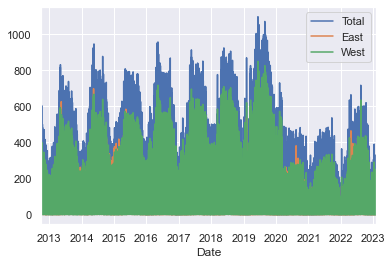

In [90]:
data.plot()

Text(0, 0.5, 'Bicycle Count')

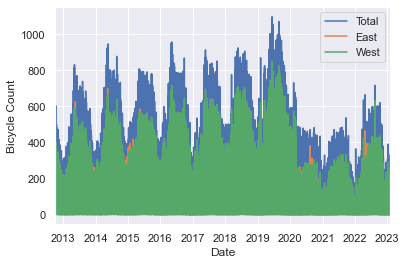

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
data.plot()
plt.ylabel('Bicycle Count')
# слишком плотная дискретизация

In [94]:
# выполним передискретизацию с шагом 1 неделя
weekly = data.resample('W').sum()
weekly

,Total,East,West
Date,,,
2012-10-07,14292.0,7297.0,6995.0
2012-10-14,16795.0,8679.0,8116.0
2012-10-21,15509.0,7946.0,7563.0
2012-10-28,13437.0,6901.0,6536.0
2012-11-04,12194.0,6408.0,5786.0
...,...,...,...
2023-01-08,9417.0,3647.0,5770.0
2023-01-15,10866.0,4181.0,6685.0
2023-01-22,10717.0,4063.0,6654.0


Text(0, 0.5, 'Bicycle Count')

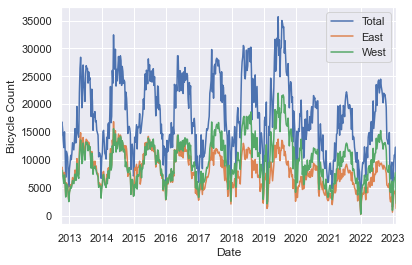

In [95]:
weekly.plot()
plt.ylabel('Bicycle Count')

Text(0, 0.5, 'Bicycle Count')

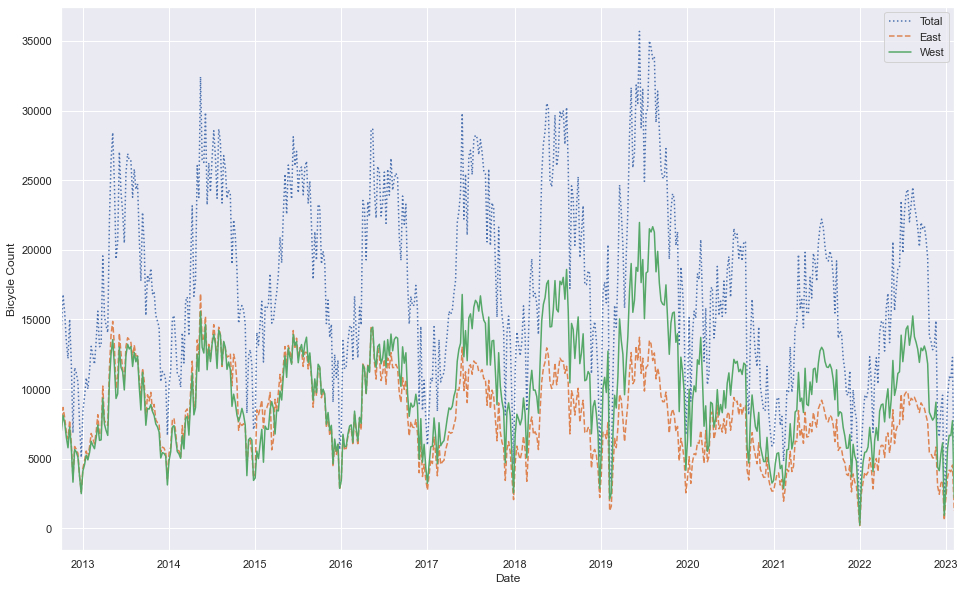

In [99]:
weekly.plot(style=[':', '--', '-'], figsize=(16,10))
plt.ylabel('Bicycle Count')

- Вычисление скользящего среднего с помощью ``pd.rolling_mean()``.

In [100]:
daily = data.resample('D').sum()
daily
# по дням

,Total,East,West
Date,,,
2012-10-03,3521.0,1760.0,1761.0
2012-10-04,3475.0,1708.0,1767.0
2012-10-05,3148.0,1558.0,1590.0
2012-10-06,2006.0,1080.0,926.0
2012-10-07,2142.0,1191.0,951.0
...,...,...,...
2023-01-27,1662.0,614.0,1048.0
2023-01-28,1096.0,478.0,618.0
2023-01-29,1153.0,509.0,644.0


Text(0, 0.5, 'mean hourly count')

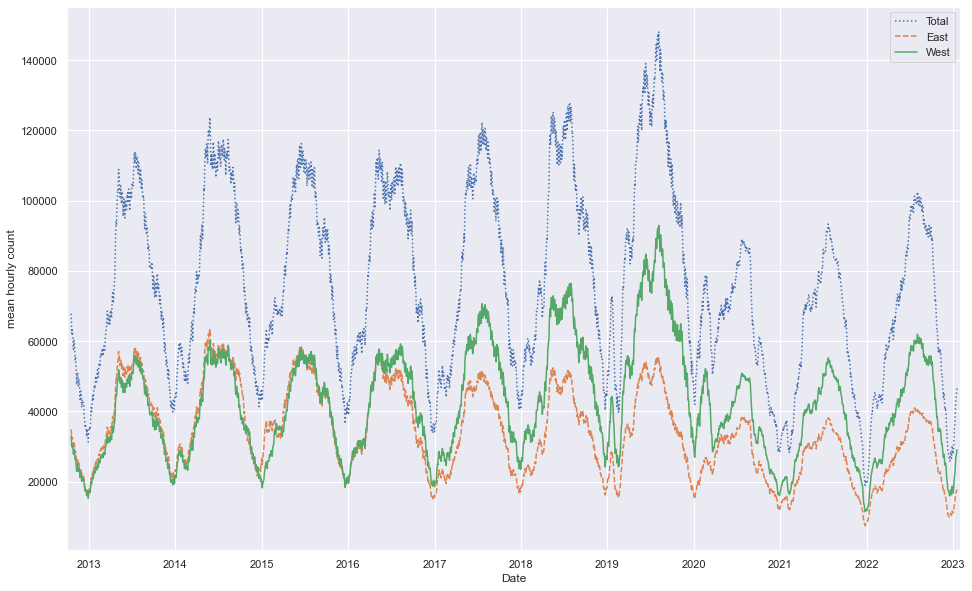

In [101]:
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'], figsize=(16,10))
plt.ylabel('mean hourly count')

<AxesSubplot:xlabel='Date'>

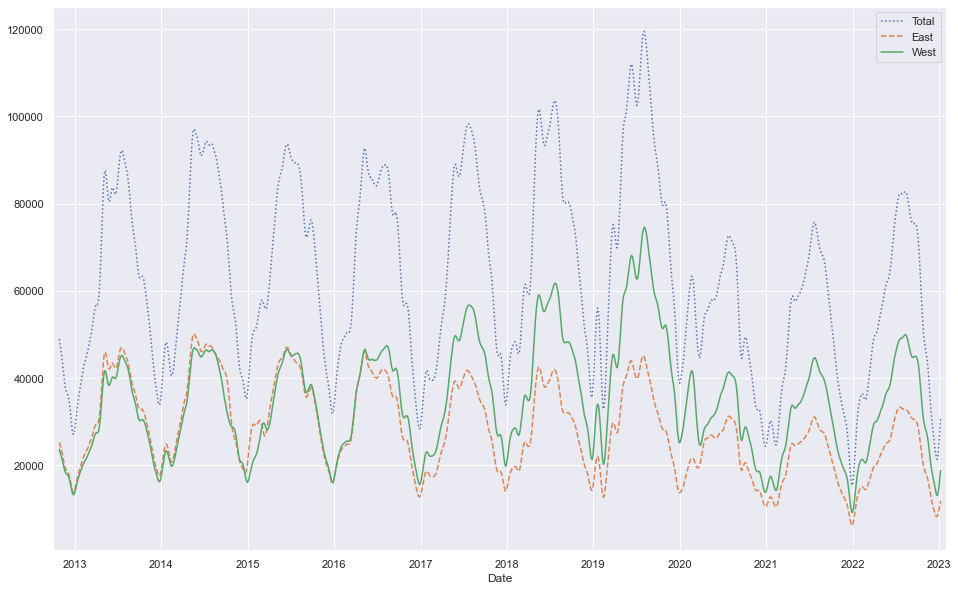

In [104]:
# для более гладкой версии можно воспользоваться оконной ф-ией, например Гауссовским окном
# 50 дней - Размер движущегося окна. Это количество наблюдений, используемых для расчета статистики. 
# Каждое окно будет фиксированного размера.
# 10 дней - ширина Гауссовой ф-ии внутри окна
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'], figsize=(16,10))

In [106]:
# daily.rolling?

### Углубляемся в изучение данных
- сглаживание скрывает от нас нюансы структуры данных, например усредненную интенсивность движения от времени суток.

In [107]:
by_time = data.groupby(data.index.time).mean()
by_time

,Total,East,West
00:00:00,10.344288,4.293931,6.050358
01:00:00,5.461171,2.393851,3.067320
02:00:00,3.571618,1.683497,1.888121
03:00:00,2.630003,1.313014,1.316989
04:00:00,6.186589,3.073681,3.112908
05:00:00,23.225550,13.447389,9.778161
06:00:00,80.078452,45.798569,34.279883
07:00:00,197.747151,117.611980,80.135171
08:00:00,279.083223,157.741055,121.342168
09:00:00,169.379639,87.658271,81.721368


In [108]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)
hourly_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])

<AxesSubplot:xlabel='time'>

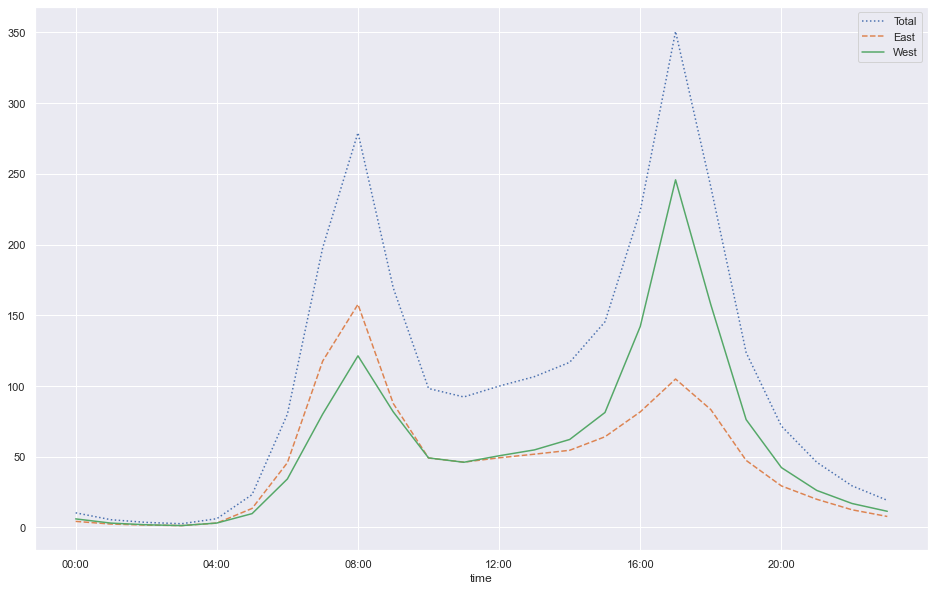

In [109]:
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'], figsize=(16,10))

In [110]:
# изменения по дням недели
by_weekly = data.groupby(data.index.day_of_week).mean()
by_weekly

,Total,East,West
Date,,,
0,119.098794,51.980674,67.118120
1,129.048168,56.296196,72.751972
2,128.755179,56.234926,72.520254
3,121.982297,53.608302,68.373995
4,110.330602,48.720504,61.610097
5,68.185142,33.043986,35.141156
6,64.164629,31.729151,32.435479


<AxesSubplot:xlabel='Date'>

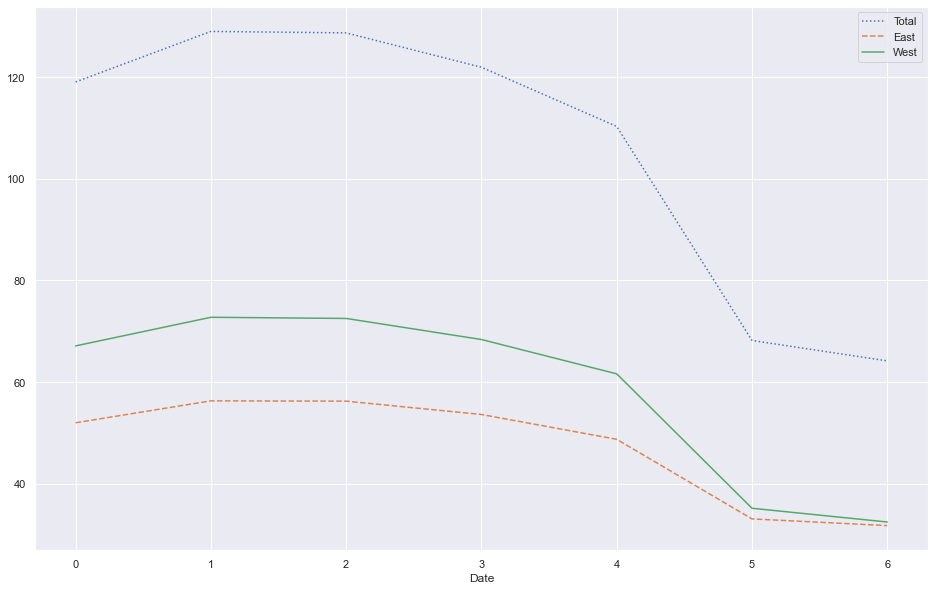

In [113]:
by_weekly.plot(style=[':', '--', '-'], figsize=(16,10))
# plt.gca().set_xticklabels([0,1,2,3,4,5,6,7])

C:\Users\Admin\AppData\Local\Temp/ipykernel_5472/2542522683.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([0,1,2,3,4,5,6,7])


[Text(-1.0, 0, '0'),
 Text(0.0, 0, '1'),
 Text(1.0, 0, '2'),
 Text(2.0, 0, '3'),
 Text(3.0, 0, '4'),
 Text(4.0, 0, '5'),
 Text(5.0, 0, '6'),
 Text(6.0, 0, '7'),
 Text(7.0, 0, '')]

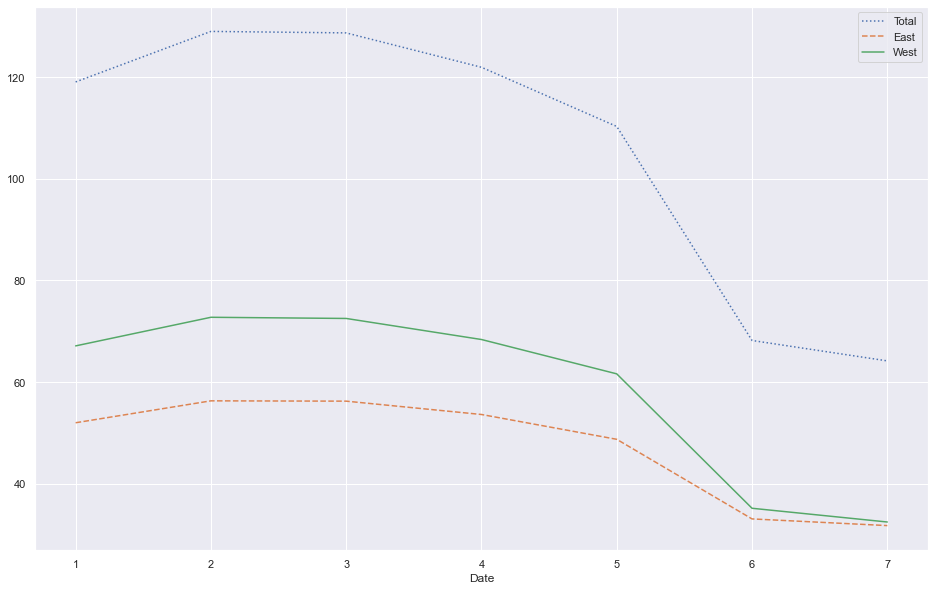

In [114]:
by_weekly.plot(style=[':', '--', '-'], figsize=(16,10))
plt.gca().set_xticklabels([0,1,2,3,4,5,6,7])

In [115]:
# почасовой тренд в будни по сравнению с выхлдными
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
weekend

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekday'], dtype='<U7')

In [116]:
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

Total        East        West
Weekday 00:00:00    8.480148    3.558071    4.922078
        01:00:00    4.197032    1.847124    2.349907
        02:00:00    2.790353    1.351763    1.438590
        03:00:00    2.405195    1.215584    1.189610
        04:00:00    7.256030    3.735065    3.520965
        05:00:00   29.712059   17.404453   12.307607
        06:00:00  105.422263   61.107607   44.314657
        07:00:00  264.057885  158.375510  105.682375
        08:00:00  366.975510  208.894249  158.081262
        09:00:00  203.763549  106.001856   97.761693
        10:00:00   95.514477   47.413140   48.101336
        11:00:00   77.594655   38.790275   38.804380
        12:00:00   82.395323   40.250557   42.144766
        13:00:00   88.530612   42.306122   46.224490
        14:00:00  100.726531   45.255659   55.470872
        15:00:00  142.065677   59.178479   82.887199
        16:00:00  257.565121   86.946939  170.618182
        17:00:00  445.457514  124.793692  320.663822
        18:00:00  302.145455   99.709833  202.435622
        19:00:00  148.597032   54.972171   93.624861
        20:00:00   83.530983   33.292022   50.238961
        21:00:00   52.115399   22.521336   29.594063
        22:00:00   32.604453   13.725417   18.879035
        23:00:00   20.321707    8.196289   12.125417
Weekend 00:00:00   15.004638    6.133581    8.871058
        01:00:00    8.621521    3.760668    4.860853
        02:00:00    5.543071    2.520599    3.022472
        03:00:00    3.192022    1.556586    1.635436
        04:00:00    3.512987    1.420223    2.092764
        05:00:00    7.009276    3.554731    3.454545
        06:00:00   16.718924    7.525974    9.192950
        07:00:00   31.970315   15.703154   16.267161
        08:00:00   59.352505   29.858071   29.494434
        09:00:00   83.451763   41.816327   41.635436
        10:00:00  105.047310   53.228200   51.819109
        11:00:00  128.932282   64.625232   64.307050
        12:00:00  143.764378   71.732839   72.031540
        13:00:00  151.869202   75.522263   76.346939
        14:00:00  156.846011   77.810761   79.035250
        15:00:00  153.786642   76.479592   77.307050
        16:00:00  139.600186   68.645640   70.954545
        17:00:00  113.899814   55.291280   58.608534
        18:00:00   87.212430   42.282004   44.930427
        19:00:00   61.320037   28.490724   32.829314
        20:00:00   42.031540   19.509276   22.522263
        21:00:00   31.127087   13.434137   17.692950
        22:00:00   21.492579    9.416512   12.076067
        23:00:00   16.346939    6.688312    9.658627

AttributeError: 'DataFrame' object has no attribute 'ix'

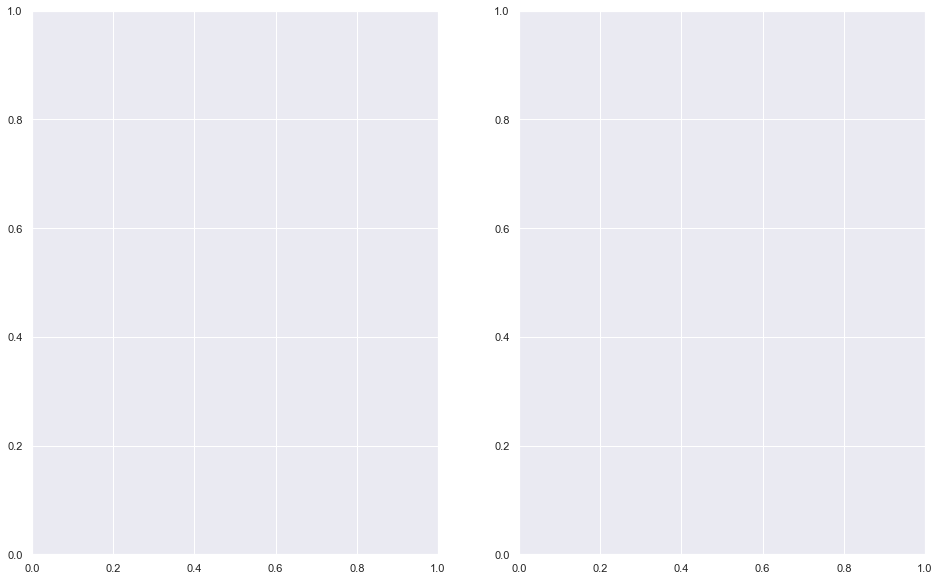

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(16,10))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-'])

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

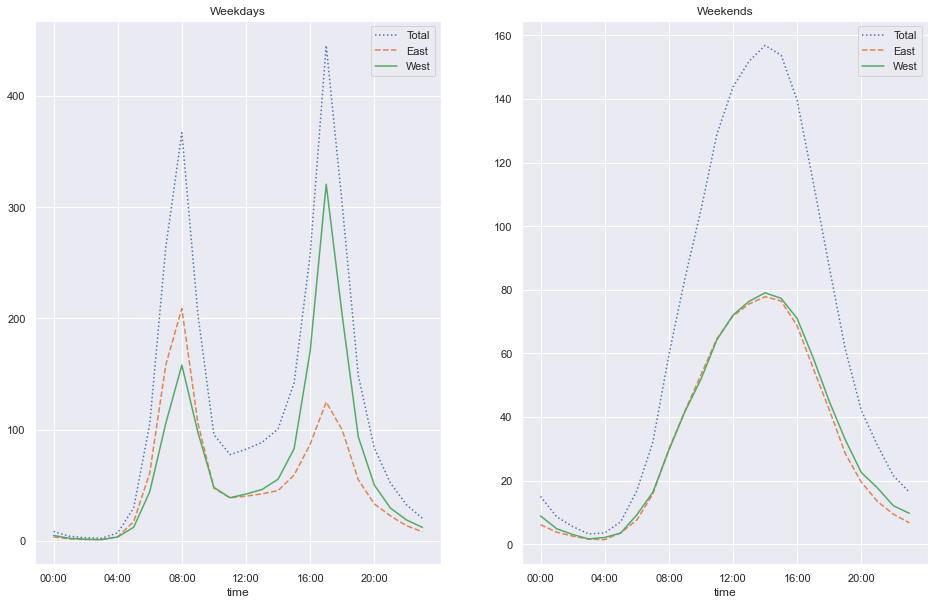

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(16,10))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-'])